In [1]:
import os
os.chdir("..//src")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

from GradientLimitPDESolver import GradientLimitPDESolver
from Boundary import *

# Initialize

In [3]:
glps: GradientLimitPDESolver = GradientLimitPDESolver()

# Set for background grid

In [4]:
n: int = 51
edge_len: float = 1.0
x0, y0 = 0.0, 0.0
glps.background_grid.setParameters((x0, y0), edge_len, n)

## $\nabla^2$ laplacian operator sparse matrix

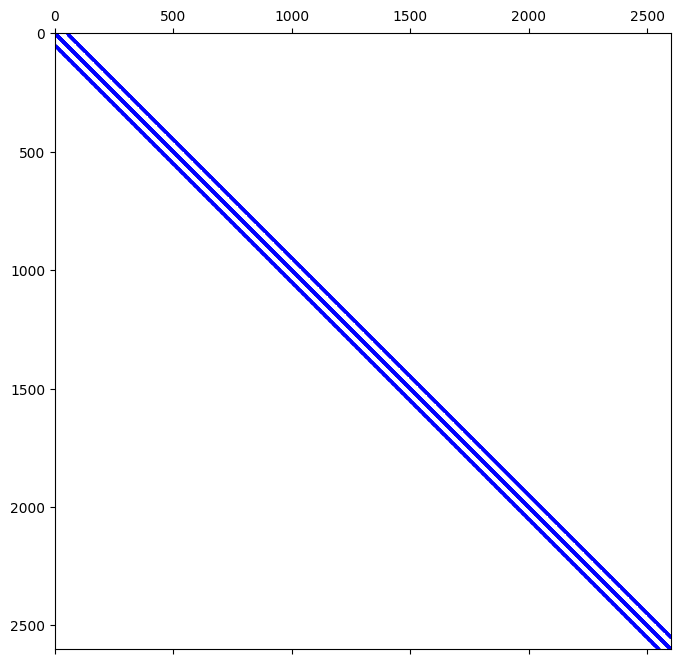

In [5]:
plt.figure(figsize=(8, 8), facecolor="w")
plt.gca().set_aspect("equal")
plt.spy(glps.background_grid.laplacian_operator, markersize=1, color="b")
plt.show()

## known index's order

> note that the order of 2D matrix is different from the order we get used to in a 2D cartesian coordinate system
> that's why I note 2D array's transpose in src/GradientLimitPDESolver.py

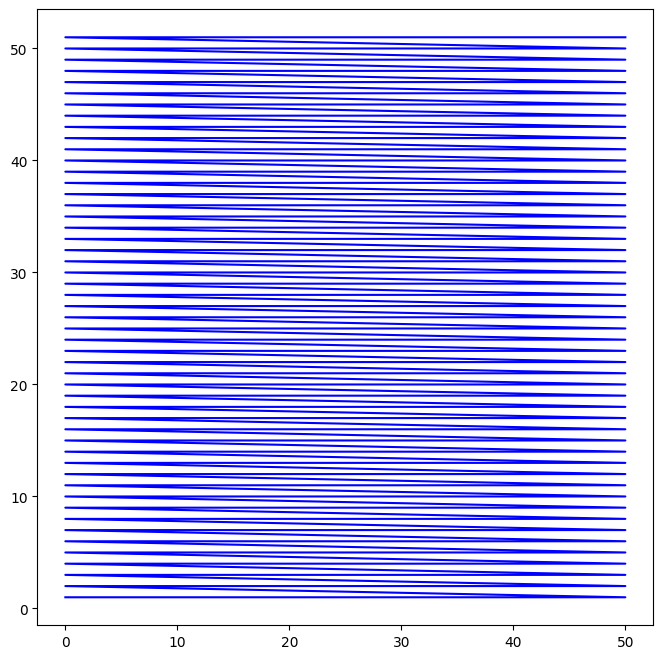

In [6]:
i_array = np.zeros(4*(n-1), dtype=int)
j_array = np.zeros(4*(n-1), dtype=int)
for k_index in range(len(glps.background_grid.known_index_array)):
    index = glps.background_grid.known_index_array[k_index]
    i_array[k_index] = index % n
    j_array[k_index] = index // n + 1
    pass
plt.figure(figsize=(8, 8), facecolor="w")
plt.gca().set_aspect("equal")
plt.plot(i_array, j_array, "b")
plt.show()

# Boundary

## inner circle boundary

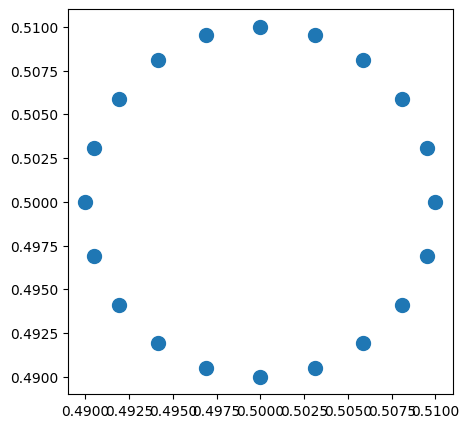

In [7]:
inner_boundary: Boundary = CircleBoundary()
inner_boundary.setCircle((0.0, 0.0), 0.5, 20)
inner_boundary = CircleBoundary()
inner_boundary.setCircle((0.5, 0.5), 0.01, 20)
inner_boundary.setNodalSpace(0.01)
inner_boundary.setNodalPsi(1)
inner_boundary.setLinearPsi(1)
plt.figure(figsize=(5,5), facecolor='w')
plt.gca().set_aspect('equal')
plt.scatter(inner_boundary.xy[:, 0], inner_boundary.xy[:, 1], s=100)
plt.show()

## outer square boundary

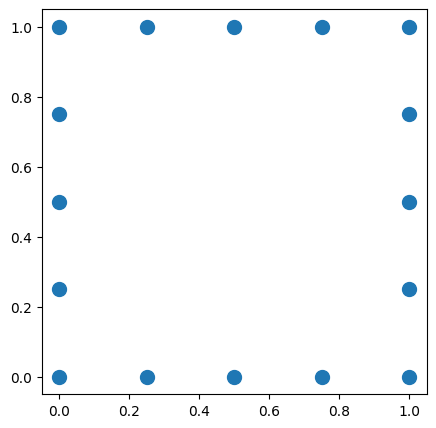

In [8]:
outer_boundary: Boundary = SquareBoundary()
outer_boundary.setSquare((0.0, 0.0), 1.0, 5)
outer_boundary.setNodalSpace(0.2)
outer_boundary.setNodalPsi(1)
outer_boundary.setLinearPsi(1)
plt.figure(figsize=(5,5), facecolor='w')
plt.gca().set_aspect('equal')
plt.scatter(outer_boundary.xy[:, 0], outer_boundary.xy[:, 1], s=100)
plt.show()

## In a same figure

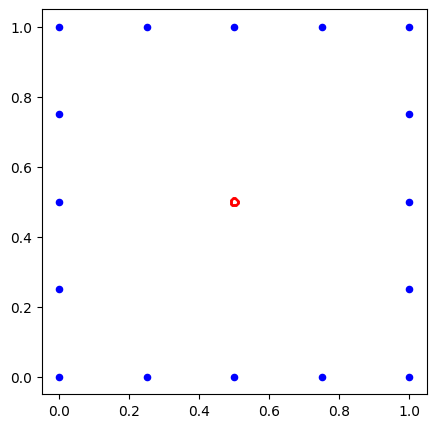

In [9]:
plt.figure(figsize=(5,5), facecolor='w')
plt.gca().set_aspect('equal')
plt.scatter(inner_boundary.xy[:, 0], inner_boundary.xy[:, 1], s=1, color='r')
plt.scatter(outer_boundary.xy[:, 0], outer_boundary.xy[:, 1], s=20, color='b')
plt.show()

# Assemble and solve

In [10]:
glps.addBoundary(inner_boundary)
glps.addBoundary(outer_boundary)
glps.setBoundaryValues(0.2)

In [11]:
glps.solve()

In [12]:
glps.result

array([[0.2       , 0.2       , 0.2       , ..., 0.2       , 0.2       ,
        0.2       ],
       [0.2       , 0.1964046 , 0.19300831, ..., 0.18678023, 0.1928777 ,
        0.2       ],
       [0.2       , 0.1940091 , 0.18850879, ..., 0.17653744, 0.18678244,
        0.2       ],
       ...,
       [0.2       , 0.19599896, 0.19297568, ..., 0.18879232, 0.19318156,
        0.2       ],
       [0.2       , 0.1976905 , 0.1960002 , ..., 0.19415837, 0.19649439,
        0.2       ],
       [0.2       , 0.2       , 0.2       , ..., 0.2       , 0.2       ,
        0.2       ]])

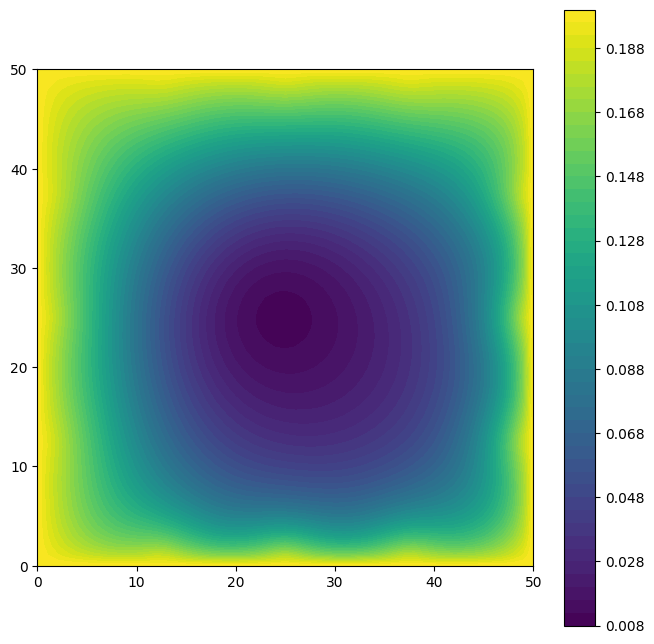

In [13]:
plt.figure(figsize=(8, 8), facecolor="w")
plt.gca().set_aspect("equal")
plt.contourf(glps.result, 50)
plt.colorbar()
plt.show()